# Vấn đề
Một công ty ô tô Trung Quốc Geely Auto mong muốn thâm nhập thị trường Mỹ bằng cách thành lập đơn vị sản xuất của họ ở đó và sản xuất ô tô tại địa phương để cạnh tranh với các đối tác Mỹ và châu Âu.

Họ đã ký hợp đồng với một công ty tư vấn ô tô để hiểu các yếu tố ảnh hưởng đến việc định giá ô tô. Cụ thể, họ muốn hiểu các yếu tố ảnh hưởng đến giá ô tô tại thị trường Mỹ, vì những yếu tố đó có thể rất khác so với thị trường Trung Quốc. Công ty muốn biết:

Những biến số nào có ý nghĩa quan trọng trong việc dự đoán giá ô tô
Những biến số đó mô tả giá của một chiếc ô tô tốt như thế nào
Dựa trên nhiều cuộc khảo sát thị trường khác nhau, công ty tư vấn đã thu thập được một bộ dữ liệu lớn về các loại ô tô khác nhau trên khắp thị trường Mỹ.

DỮ LIỆU DỮ LIỆU

1. Car_ID: ID duy nhất của mỗi quan sát
2. Ký hiệu: Xếp hạng rủi ro bảo hiểm được chỉ định của nó, Giá trị +3 cho biết ô tô có rủi ro, -3 cho biết nó có thể khá an toàn.
3. carCompany: Tên hãng xe
4. loại nhiên liệu: Loại nhiên liệu ô tô, tức là xăng hoặc dầu diesel
5. nguyện vọng: Hút dùng trên ô tô
6. Doornumber: Số cửa trên ô tô
7. carbody: thân xe
8. drivewheel: loại bánh dẫn động
9. enginelocation: Vị trí động cơ ô tô
10. Chiều dài cơ sở: Chiều dài cơ sở của xe (
11. carlength: Chiều dài của xe
12. carwidth: Chiều rộng của xe
13. carheight: chiều cao của xe
14. Trọng lượng lề đường: Trọng lượng của ô tô không có người ngồi hoặc hành lý.
15. enginetype: Loại động cơ.
16. số xi lanh: xi lanh đặt trên ô tô
17.enginesize: Kích thước của ô tô
18. hệ thống nhiên liệu: Hệ thống nhiên liệu của ô tô
19. Boreratio: Boreratio của ô tô
20. Stroke: Hành trình hay thể tích bên trong động cơ
21. Compressionratio: Tỷ số nén của ô tô
22. mã lực: Mã lực
23.peakrpm: vòng tua đỉnh điểm của ô tô
24. citympg: Số dặm trong thành phố
25. Highwaympg: Số dặm trên đường cao tốc
26. price: Giá xe

#Mục tiêu kinh doanh
Chúng ta được yêu cầu lập mô hình giá ô tô với các biến độc lập có sẵn. Nó sẽ được ban quản lý sử dụng để hiểu chính xác mức giá thay đổi như thế nào với các biến độc lập. Theo đó, họ có thể điều khiển thiết kế của ô tô, chiến lược kinh doanh, v.v. để đáp ứng các mức giá nhất định. Hơn nữa, mô hình này sẽ là một cách tốt để ban quản lý hiểu được động lực định giá của một thị trường mới.

In [ ]:
!pip install optuna

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 380.1/380.1 kB 5.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.4/233.4 kB 14.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.7/78.7 kB 6.0 MB/s eta 0:00:00


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np #mảng và ma trận số học
import pandas as pd #dữ liệu bảng và chuỗi thời gian
import matplotlib.pyplot as plt #tạo biểu đồ và trực quan hóa dữ liệu
import seaborn as sns #tạo biểu đồ và trực quan hóa dữ liệu tốt hơn,dễ dàng hơn
import os  #tương tác với hệ thống tệp
#import các lớp và hàm từ scikit-learn để xử lí dữ liệu,chuẩn hóa,mã hóa,chia và trích chọn các đặc trưng
from sklearn.preprocessing import StandardScaler,OneHotEncoder,PowerTransformer,MinMaxScaler,RobustScaler
#thực hiện cross-validation,chia tập dữ liệu và tìm kiếm siêu tham số
from sklearn.model_selection import KFold,cross_val_predict,train_test_split,GridSearchCV,cross_val_score
#các hàm để huấN luyện mô hình hồi quy tuyến tính
from sklearn.linear_model import LinearRegression,Lasso,Ridge,ElasticNet

#huấn luyện mô hình hồi quy dựa trên đặc trưng gần nhất.
from sklearn.neighbors import KNeighborsRegressor
# huấn luyện mô hình hồi quy dựa trên máy vecto hỗ trợ(SVM)
from sklearn.svm import SVR
# huấn luyện ,đánh giá hiệu suất của mô hình
from sklearn.metrics import r2_score,mean_squared_error
#tạo pipeline cho việc xử lí dữ liệu và huấn luyện mô hình
from sklearn.pipeline import make_pipeline
#xử lí các biến đầu vào có cấu trúc phức tạp
from sklearn.compose import make_column_transformer


#huấn luyện các mô hình
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor,ExtraTreesRegressor
#lựa chọn và trích chọn đặc trưng
from sklearn.feature_selection import SelectKBest,SelectPercentile,f_classif,f_regression,mutual_info_regression,mutual_info_classif,SelectFromModel,RFE
#huấn luyện mô hình hồi quy sử dụng Gradient Boosting
from xgboost import XGBRegressor
from xgboost import plot_importance
#thư viện giúp tối ưu hóa siêu tham số mô hình
import optuna
#importing plotly and cufflinks in offline mode
import cufflinks as cf
import plotly.offline #tạo biểu đồ tương tác với Plotly trong môi trường offline
cf.go_offline()
cf.set_config_file(offline = False,world_readable = True)
#hiện thị thông báo trong quá trình chạy chương trình
import warnings
warnings.filterwarnings('ignore')

In [ ]:
#số cột và hàng tối đa hiển thị khi in một DataFrame
pd.options.display.max_columns = 100
pd.options.display.max_rows = 900
pd.set_option('max_colwidth',200)
df = pd.read_csv("/content/drive/MyDrive/CarpricePrediction/CarPrice_Assignment.csv")
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [ ]:
df.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [ ]:
df.describe() #tóm tắt thống kê của các cột

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [ ]:
#đếm số lượng các hàng trùng lặp trong DataFrame data.
df.duplicated().sum()


0

In [ ]:
#phân tích và đếm giá trị thiếu cho mỗi cột trong DataFrame
def missing (df):
    missing_number = df.isnull().sum().sort_values(ascending=False)
    missing_percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
    missing_values = pd.concat([missing_number, missing_percent], axis=1, keys=['Missing_Number', 'Missing_Percent'])
    return missing_values

missing(df)

,Missing_Number,Missing_Percent
car_ID,0,0.0
symboling,0,0.0
highwaympg,0,0.0
citympg,0,0.0
peakrpm,0,0.0
horsepower,0,0.0
compressionratio,0,0.0
stroke,0,0.0
boreratio,0,0.0
fuelsystem,0,0.0


In [ ]:
df.nunique() #đếm số lượng duy nhất trong mỗi cột của DF

car_ID              205
symboling             6
CarName             147
fueltype              2
aspiration            2
doornumber            2
carbody               5
drivewheel            3
enginelocation        2
wheelbase            53
carlength            75
carwidth             44
carheight            49
curbweight          171
enginetype            7
cylindernumber        7
enginesize           44
fuelsystem            8
boreratio            38
stroke               37
compressionratio     32
horsepower           59
peakrpm              23
citympg              29
highwaympg           30
price               189
dtype: int64

In [ ]:
df1 = df.copy()

In [ ]:
df1["CarName"].sample(5)

90                        nissan gt-r
121    plymouth satellite custom (sw)
64                          mazda 626
139                         subaru dl
183      volkswagen 1131 deluxe sedan
Name: CarName, dtype: object

In [ ]:
df1["CarName"].unique( )

array(['alfa-romero giulia', 'alfa-romero stelvio',
       'alfa-romero Quadrifoglio', 'audi 100 ls', 'audi 100ls',
       'audi fox', 'audi 5000', 'audi 4000', 'audi 5000s (diesel)',
       'bmw 320i', 'bmw x1', 'bmw x3', 'bmw z4', 'bmw x4', 'bmw x5',
       'chevrolet impala', 'chevrolet monte carlo', 'chevrolet vega 2300',
       'dodge rampage', 'dodge challenger se', 'dodge d200',
       'dodge monaco (sw)', 'dodge colt hardtop', 'dodge colt (sw)',
       'dodge coronet custom', 'dodge dart custom',
       'dodge coronet custom (sw)', 'honda civic', 'honda civic cvcc',
       'honda accord cvcc', 'honda accord lx', 'honda civic 1500 gl',
       'honda accord', 'honda civic 1300', 'honda prelude',
       'honda civic (auto)', 'isuzu MU-X', 'isuzu D-Max ',
       'isuzu D-Max V-Cross', 'jaguar xj', 'jaguar xf', 'jaguar xk',
       'maxda rx3', 'maxda glc deluxe', 'mazda rx2 coupe', 'mazda rx-4',
       'mazda glc deluxe', 'mazda 626', 'mazda glc', 'mazda rx-7 gs',
       'mazda glc 

In [ ]:
#tạo một cột mới "model"
df1["model"] =[x.split()[0] for x in df1['CarName']]
#sửa đổi các giá trị trong cột "model"
df1['model'] = df1['model'].replace({'maxda':'Mazda','mazda':'Mazda',
                                     'nissan': 'Nissan',
                                     'porcshce':'Porche','porsche':'Porsche',
                                     'toyouta':'Toyota',"toyota" :'Toyota',
                                     "vokswagen":'Volkswagen',"vw":'Volkwagen',"volkwagen":'Volkwagen'})

In [ ]:
df1 = df1.drop(["car_ID",'CarName'],axis =1)

In [ ]:
print(f' we have {df1.shape[0]} instances with the {df1.shape[1]-1} feature and 1 output variable')

 we have 205 instances with the 24 feature and 1 output variable


In [ ]:
#phân tách các cột trong df1 thành 2 nhóm "numerical" và "categorical"
numerical = df1.drop(['price'],axis =1).select_dtypes('number').columns #chọn các cột có kiểu dữ liệu là số trong DF đã loại bỏ cột "price"
#tạo biến cate để chứa tên tất cả các cột có kiểu dữ liệu là object(các cột phân loại) trong df1
categorical = df1.select_dtypes('object').columns
#in ra tên của tất cả các cột số trong df1
print(f'Numerical Columns :{df1[numerical].columns}')
print("\n")
#in ra tất cả tên trong cate
print(f'Categorical Columns :{df1[categorical].columns}')

Numerical Columns :Index(['symboling', 'wheelbase', 'carlength', 'carwidth', 'carheight',
       'curbweight', 'enginesize', 'boreratio', 'stroke', 'compressionratio',
       'horsepower', 'peakrpm', 'citympg', 'highwaympg'],
      dtype='object')


Categorical Columns :Index(['fueltype', 'aspiration', 'doornumber', 'carbody', 'drivewheel',
       'enginelocation', 'enginetype', 'cylindernumber', 'fuelsystem',
       'model'],
      dtype='object')


In [ ]:
df1['price'].describe() #tóm tắt thống kê cơ bản của dữ liệu

count      205.000000
mean     13276.710571
std       7988.852332
min       5118.000000
25%       7788.000000
50%      10295.000000
75%      16503.000000
max      45400.000000
Name: price, dtype: float64

In [ ]:
#độ lệch
print( f"Skewness: {df1['price'].skew()}")


Skewness: 1.7776781560914454


In [ ]:
df[numerical].describe()

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220
std,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000
25%,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000
50%,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000
75%,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000
max,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000


In [ ]:
#tạo biểu đồ "histogram" ,tương tác trực quan
df1[numerical].iplot(kind='hist');

In [ ]:
df1[numerical].iplot(kind= 'histogram',subplots= True,bins = 50)

In [ ]:
# ngưỡng giới hạn để đánh giá độ lệch. Nhìn chung, dưới abs(1) có vẻ chấp nhận được đối với các mô hình tuyến tính.
skew_limit = 0.75 # This is our threshold-limit to evaluate skewness. Overall below abs(1) seems acceptable for the linear models.
skew_vals = df1[numerical].skew()
skew_cols= skew_vals[abs(skew_vals)> skew_limit].sort_values(ascending=False)
skew_cols


compressionratio    2.610862
enginesize          1.947655
horsepower          1.405310
wheelbase           1.050214
carwidth            0.904003
dtype: float64

In [ ]:
df1[skew_cols.index].iplot(kind = 'hist');

In [ ]:
df1[skew_cols.index].iplot(kind= 'histogram',subplots = True,bins = 50)

In [ ]:
df_try = df1.copy()

for col in skew_cols.index.values: #lặp qua mỗi cột trong DF "df_try" mà có giá trị skewness cao
    df_try[col]=df_try[col].apply(np.log1p) #giảm độ lệch áp dụng hàm "log1p"
print(df_try[skew_cols.index].skew())
print()
df_try[skew_cols.index].iplot(kind='histogram',subplots = True,bins = 50)

compressionratio    2.379056
enginesize          0.864706
horsepower          0.489938
wheelbase           0.885024
carwidth            0.815331
dtype: float64



In [ ]:
df_trans = df1[skew_cols.index].copy() #chọn những cột có độ lệch cao được xác định trước đó
#sử dụng phương pháp "yeo-johnson" để biến đổi dữ liệu để làm chúng gần với phân phối chuẩn hơn
pt = PowerTransformer(method='yeo-johnson')
trans= pt.fit_transform(df_trans) #tính toán các tham số biến đổi dữ liệu "df_train"
df_trans = pd.DataFrame(trans, columns =skew_cols.index )
print(df_trans.skew())
print()
df_trans.iplot(kind='histogram',subplots=True,bins=50);

compressionratio    0.034222
enginesize         -0.002542
horsepower          0.049318
wheelbase          -0.003485
carwidth            0.000000
dtype: float64



<Axes: >

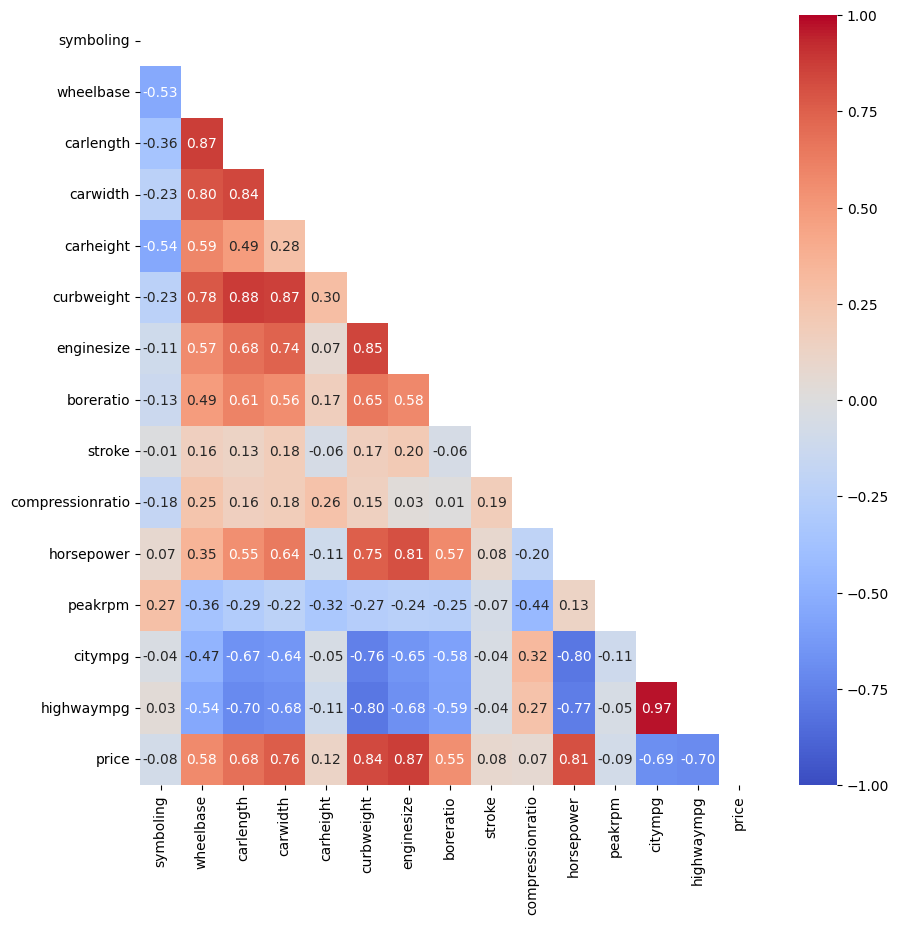

In [ ]:
#chọn tất cả các cột có kiểu dữ liệu số từ df1 và lưu trữ tên trong biến "numerical"
numerical1 = df1.select_dtypes('number').columns
#tính ma trận tương quan giữa các biến số trong "df1" và chỉ lưu các giá trị ở phía trên đường chéo chính của ma trận
matrix = np.triu(df1[numerical1].corr())
fig,ax = plt.subplots(figsize = (10,10))

sns.heatmap(df1[numerical1].corr(),annot = True,fmt= ".2f",vmin =-1,vmax =1,center = 0,cmap= 'coolwarm',mask = matrix,ax = ax)

#Tính ma trận tương quan giữa các biến số trong DataFrame df1.

- annot=True: Hiển thị các giá trị của tương quan trên biểu đồ.

- fmt=".2f": Định dạng hiển thị cho các giá trị là số thập phân có 2 chữ số sau dấu phẩy.

- vmin=-1, vmax=1: Đặt giá trị tối thiểu và tối đa cho màu sắc của biểu đồ heatmap.

- center=0: Đặt mức trung tâm của màu sắc cho các giá trị là 0.

- cmap='coolwarm': Sử dụng bảng màu 'coolwarm' cho biểu đồ heatmap.

- ask=matrix: Áp dụng mask để chỉ hiển thị nửa phía trên của ma trận tương quan.

- ax=ax: Sử dụng axis đã tạo (ax) để vẽ biểu đồ heatmap lên figure.

In [ ]:
print(df1.groupby('fueltype')['price'].mean().sort_values())
print()
df1.groupby('fueltype')['price'].mean().iplot(kind ='histogram',subplots = True,bins = 50)

fueltype
gas       12999.7982
diesel    15838.1500
Name: price, dtype: float64



In [ ]:
#nhóm dữ liệu trong DF "df1" theo giá trị của cột "carbody"
print(df1.groupby('carbody')['price'].mean().sort_values())
print()
df1.groupby('carbody')['price'].mean().iplot(kind ='histogram',subplots = True,bins = 50)



carbody
hatchback      10376.652386
wagon          12371.960000
sedan          14344.270833
convertible    21890.500000
hardtop        22208.500000
Name: price, dtype: float64



In [ ]:
print(df1.groupby('drivewheel')['price'].mean().sort_values())
print()
df1.groupby('drivewheel')['price'].mean().iplot(kind ='histogram',subplots = True,bins = 50)



drivewheel
fwd     9239.308333
4wd    11087.463000
rwd    19910.809211
Name: price, dtype: float64



In [ ]:
print(df1.groupby('enginelocation')['price'].mean().sort_values())
print()
df1.groupby('enginelocation')['price'].mean().iplot(kind ='histogram',subplots = True,bins = 50)



enginelocation
front    12961.097361
rear     34528.000000
Name: price, dtype: float64



In [ ]:
print(df1.groupby('enginetype')['price'].mean().sort_values())
print()
df1.groupby('enginetype')['price'].mean().iplot(kind ='histogram',subplots = True,bins = 50)



enginetype
ohc      11574.048426
rotor    13020.000000
ohcf     13738.600000
l        14627.583333
dohc     18116.416667
ohcv     25098.384615
dohcv    31400.500000
Name: price, dtype: float64



In [ ]:
print(df1.groupby('fuelsystem')['price'].mean().sort_values())
print()
df1.groupby('fuelsystem')['price'].mean().iplot(kind ='histogram',subplots = True,bins = 50)



fuelsystem
2bbl     7478.151515
1bbl     7555.545455
spdi    10990.444444
spfi    11048.000000
4bbl    12145.000000
mfi     12964.000000
idi     15838.150000
mpfi    17754.602840
Name: price, dtype: float64



In [ ]:
print(df1.groupby("model")['price'].mean().sort_values())
print()
df1.groupby('model')['price'].mean().iplot(kind = 'histogram',subplots= True,bins= 50)



model
chevrolet       6007.000000
Volkswagen      7775.000000
dodge           7875.444444
plymouth        7963.428571
honda           8184.692308
subaru          8541.250000
isuzu           8916.500000
mitsubishi      9239.769231
renault         9595.000000
Toyota          9885.812500
volkswagen     10175.555556
Nissan         10415.666667
Mazda          10652.882353
Volkwagen      10787.500000
saab           15223.333333
peugeot        15489.090909
alfa-romero    15498.333333
mercury        16503.000000
audi           17859.166714
volvo          18063.181818
bmw            26118.750000
Porsche        31118.625000
Porche         32528.000000
buick          33647.000000
jaguar         34600.000000
Name: price, dtype: float64



In [ ]:
df2 =pd.get_dummies(df1,columns = categorical,drop_first = True)
df2.head()

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,fueltype_gas,aspiration_turbo,doornumber_two,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,drivewheel_fwd,drivewheel_rwd,enginelocation_rear,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi,model_Nissan,model_Porche,model_Porsche,model_Toyota,model_Volkswagen,model_Volkwagen,model_alfa-romero,model_audi,model_bmw,model_buick,model_chevrolet,model_dodge,model_honda,model_isuzu,model_jaguar,model_mercury,model_mitsubishi,model_peugeot,model_plymouth,model_renault,model_saab,model_subaru,model_volkswagen,model_volvo
0,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,13495.0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500.0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,16500.0,1,0,1,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,2,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,13950.0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,2,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22,17450.0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


##Baseline Model ( Mô hình cơ bản)

In [ ]:
X = df2.drop('price',axis = 1)
y = df2['price']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3,random_state = 42)

model = LinearRegression()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
print(f'Model {model} and rmse score is: {np.sqrt(mean_squared_error(y_test,y_pred))},r2 score is {r2_score(y_test,y_pred)}')



Model LinearRegression() and rmse score is: 2661.2639305711114,r2 score is 0.8977788954723191


# Ridge & Lasso & Elasticnet & KNN with Scaler and Transformer

In [ ]:
#tạo các danh sách rỗng để lưu trữ kết quả đánh giá của mô hình
rmse_test =[]
r2_test =[]
model_names =[]

numerical2= df2.drop(['price'], axis=1).select_dtypes('number').columns

X= df2.drop('price', axis=1)
y= df2['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

s = StandardScaler()
p= PowerTransformer(method='yeo-johnson', standardize=True)

rr = Ridge()
las = Lasso()
el= ElasticNet()
knn = KNeighborsRegressor()

models = [rr,las,el,knn]

for model in models:
    #biến đổi dữ liệu cho các cột số và các cột có độ lệch cao được xác định từ trước
    ct = make_column_transformer((s,numerical2),(p,skew_cols.index),remainder='passthrough')
    pipe = make_pipeline(ct, model) # được sử dụng để tạo mọt luồng xử lí dữ liệu tự động bằng cách kết hợp các bộ biến đổi và mô hình hồi quy
    pipe.fit(X_train, y_train)
    y_pred = pipe.predict(X_test)
    rmse_test.append(round(np.sqrt(mean_squared_error(y_test, y_pred)),2))
    r2_test.append(round(r2_score(y_test, y_pred),2))
    print (f'model : {model} and  rmse score is : {round(np.sqrt(mean_squared_error(y_test, y_pred)),2)}, r2 score is {round(r2_score(y_test, y_pred),2)}')

model_names = ['Ridge','Lasso','ElasticNet','KNeighbors']
result_df = pd.DataFrame({'RMSE':rmse_test,'R2_Test':r2_test}, index=model_names)
result_df

model : Ridge() and  rmse score is : 2410.64, r2 score is 0.92
model : Lasso() and  rmse score is : 2313.94, r2 score is 0.92
model : ElasticNet() and  rmse score is : 3369.88, r2 score is 0.84
model : KNeighborsRegressor() and  rmse score is : 4157.54, r2 score is 0.75


,RMSE,R2_Test
Ridge,2410.64,0.92
Lasso,2313.94,0.92
ElasticNet,3369.88,0.84
KNeighbors,4157.54,0.75


# Random Forest& Gradient Boosting & Extra Trees & XGBoost

In [ ]:
rmse_test =[]
r2_test =[]
model_names =[]



X= df2.drop('price', axis=1)
y= df2['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


rf = RandomForestRegressor(random_state=42)
gb = GradientBoostingRegressor(random_state=42)
et= ExtraTreesRegressor(random_state=42)
xgb = XGBRegressor(random_state=42)

models = [rf,gb,et,xgb]

for model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    rmse_test.append(round(np.sqrt(mean_squared_error(y_test, y_pred)),2))
    r2_test.append(round(r2_score(y_test, y_pred),2))
    print (f'model : {model} and  rmse score is : {round(np.sqrt(mean_squared_error(y_test, y_pred)),2)}, r2 score is {round(r2_score(y_test, y_pred),4)}')

model_names = ['RandomForest','GradientBoost','ExtraTree','XGB']
result_df = pd.DataFrame({'RMSE':rmse_test,'R2_Test':r2_test}, index=model_names)
result_df

model : RandomForestRegressor(random_state=42) and  rmse score is : 1995.62, r2 score is 0.9425
model : GradientBoostingRegressor(random_state=42) and  rmse score is : 2352.82, r2 score is 0.9201
model : ExtraTreesRegressor(random_state=42) and  rmse score is : 2536.6, r2 score is 0.9071
model : XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_

,RMSE,R2_Test
RandomForest,1995.62,0.94
GradientBoost,2352.82,0.92
ExtraTree,2536.60,0.91
XGB,2507.69,0.91


# Best Model with the Hyperparameter Tuning

In [ ]:
X = df2.drop('price',axis = 1)
y = df2['price']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3 ,random_state = True)

rf= RandomForestRegressor(n_estimators = 220,random_state = 42)
rf.fit(X_train,y_train)
y_pred = rf.predict(X_test)
print(f'rmse score is :{round(np.sqrt(mean_squared_error(y_test,y_pred)),4)},r2 score is {round(r2_score(y_test,y_pred),4)}')



rmse score is :2017.1234,r2 score is 0.9326


# Feature Importance (Tầm quan trọng của tính năng)

symboling : 0.002
wheelbase : 0.008
carlength : 0.013
carwidth : 0.01
carheight : 0.003
curbweight : 0.157
enginesize : 0.632
boreratio : 0.004
stroke : 0.003
compressionratio : 0.003
horsepower : 0.025
peakrpm : 0.004
citympg : 0.003
highwaympg : 0.114
drivewheel_rwd : 0.001
enginetype_ohc : 0.002
fuelsystem_mpfi : 0.001
model_bmw : 0.006



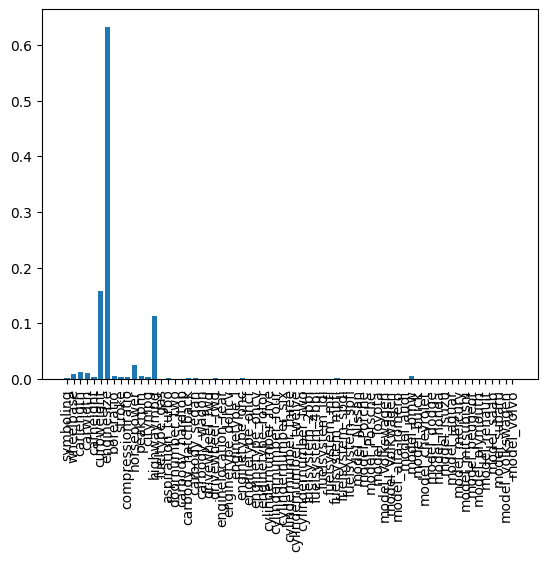

In [ ]:
importances = rf.feature_importances_
feature_names = [f'feature {i}' for i in range(X.shape[1])]

# what are scores for the features
for i in range(len(rf.feature_importances_)):
    if rf.feature_importances_[i] >0.001:
        print(f'{X_train.columns[i]} : {round(rf.feature_importances_[i],3)}')

print()

plt.bar([X_train.columns[i] for i in range(len(rf.feature_importances_))], rf.feature_importances_)
plt.xticks(rotation=90)
plt.rcParams["figure.figsize"] = (24,12)
plt.show()

In [ ]:
import pandas  as pd
import numpy as np
import seaborn  as sns
import matplotlib.pyplot as plt

from scipy import stats
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler
from scipy.stats import norm,skew
from sklearn.model_selection import KFold,cross_val_score,train_test_split
from scipy.special import boxcox

from sklearn.linear_model import Ridge ,BayesianRidge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

import warnings
warnings.filterwarnings('ignore')




In [ ]:
def train_model(x_train, x_test, y_train, y_test):
    models = []
    n_folds = 20

    models.append(('R', Ridge(random_state=42)))
    models.append(('BR', BayesianRidge(n_iter=1000)))
    models.append(('KNR', KNeighborsRegressor()))
    models.append(('DTR', DecisionTreeRegressor(random_state=42)))
    models.append(('SVR', SVR()))
    models.append(('ABR', AdaBoostRegressor(n_estimators=300, random_state=42)))
    models.append(('BR', BaggingRegressor(n_estimators=300, random_state=42)))
    models.append(('ETR', ExtraTreesRegressor(n_estimators=300, random_state=42)))
    models.append(('GBR', GradientBoostingRegressor(n_estimators=300, random_state=42)))
    models.append(('XGB', XGBRegressor(n_estimators=300, random_state=42)))
    models.append(('RFR', RandomForestRegressor(n_estimators=300, random_state=42)))

    for name, model in models:

        kf = KFold(n_folds, shuffle=True, random_state=42)
        cv_results = cross_val_score(model, x_train, y_train, cv=kf, scoring='r2')

        model = model.fit(x_train, y_train)
        m_predict = model.predict(x_test)
        m_score = r2_score(np.exp(y_test), np.exp(m_predict))
        print("%s: r2_test = %.3f /// r2_train = %.3f" % (name, m_score, cv_results.mean()))


